# EDA: Exploratory Data Analysis

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()
#os.chdir('/Users/cody/Downloads/Food and Education')

'/Users/cody/Downloads/Food and Education'

## Median Household Income

In [2]:
median_income = pd.read_csv(r'Median Household Income 2020/ACSST5Y2020.S1901-Data.csv')
median_income.head(10) #view first 10 rows

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M,Unnamed: 130
0,Geography,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000",Margin of Error!!Households!!Total!!Less than ...,"Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to...","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to...",...,Margin of Error!!Nonfamily households!!Median ...,Estimate!!Nonfamily households!!Mean income (d...,Margin of Error!!Nonfamily households!!Mean in...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,NaN
1,0500000US01001,"Autauga County, Alabama",21559,366,6.2,1.4,4.6,1.2,12.3,2.0,...,3726,43328,3704,(X),(X),(X),(X),36.1,(X),NaN
2,0500000US01003,"Baldwin County, Alabama",84047,1143,5.2,1.0,4.8,0.7,7.7,0.8,...,2468,45788,3100,(X),(X),(X),(X),28.4,(X),NaN
3,0500000US01005,"Barbour County, Alabama",9322,338,14.6,2.6,7.6,1.5,18.4,2.2,...,2212,30876,5454,(X),(X),(X),(X),36.8,(X),NaN
4,0500000US01007,"Bibb County, Alabama",7259,299,11.0,3.3,7.1,2.8,10.5,2.7,...,3054,39792,10893,(X),(X),(X),(X),34.7,(X),NaN
5,0500000US01009,"Blount County, Alabama",21205,430,10.1,2.0,4.6,1.0,11.0,1.9,...,2896,36783,6701,(X),(X),(X),(X),40.5,(X),NaN
6,0500000US01011,"Bullock County, Alabama",3429,195,18.2,4.6,9.8,5.0,11.9,4.6,...,5807,26357,7519,(X),(X),(X),(X),43.7,(X),NaN
7,0500000US01013,"Butler County, Alabama",6649,282,7.9,2.1,7.8,2.3,12.8,2.7,...,6204,34978,6706,(X),(X),(X),(X),42.7,(X),NaN
8,0500000US01015,"Calhoun County, Alabama",44572,642,8.0,1.0,6.1,0.7,10.9,1.2,...,2123,37925,2582,(X),(X),(X),(X),34.3,(X),NaN
9,0500000US01017,"Chambers County, Alabama",13582,418,6.0,1.5,6.5,1.8,13.9,1.7,...,2920,36567,4642,(X),(X),(X),(X),42.4,(X),NaN


In [3]:
# Split County, State entries into individual columns
median_income[['COUNTY', 'STATE']] = median_income['NAME'].str.split(',', expand = True) 
median_income = median_income.drop('NAME', axis  = 1)

# Create a useful table for referencing variable names
var_names = median_income.columns
descriptions = median_income.iloc[0].values

median_reference = pd.DataFrame({
    "Variable Name": var_names,
    "Description": descriptions
})

median_income = median_income.drop(0, axis = 0).reset_index(drop = True)

median_income.head(10) #view first 10 rows

,GEO_ID,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,S1901_C01_005E,...,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M,Unnamed: 130,COUNTY,STATE
0,0500000US01001,21559,366,6.2,1.4,4.6,1.2,12.3,2.0,8.5,...,3704,(X),(X),(X),(X),36.1,(X),NaN,Autauga County,Alabama
1,0500000US01003,84047,1143,5.2,1.0,4.8,0.7,7.7,0.8,10.0,...,3100,(X),(X),(X),(X),28.4,(X),NaN,Baldwin County,Alabama
2,0500000US01005,9322,338,14.6,2.6,7.6,1.5,18.4,2.2,9.4,...,5454,(X),(X),(X),(X),36.8,(X),NaN,Barbour County,Alabama
3,0500000US01007,7259,299,11.0,3.3,7.1,2.8,10.5,2.7,9.1,...,10893,(X),(X),(X),(X),34.7,(X),NaN,Bibb County,Alabama
4,0500000US01009,21205,430,10.1,2.0,4.6,1.0,11.0,1.9,11.2,...,6701,(X),(X),(X),(X),40.5,(X),NaN,Blount County,Alabama
5,0500000US01011,3429,195,18.2,4.6,9.8,5.0,11.9,4.6,10.6,...,7519,(X),(X),(X),(X),43.7,(X),NaN,Bullock County,Alabama
6,0500000US01013,6649,282,7.9,2.1,7.8,2.3,12.8,2.7,10.2,...,6706,(X),(X),(X),(X),42.7,(X),NaN,Butler County,Alabama
7,0500000US01015,44572,642,8.0,1.0,6.1,0.7,10.9,1.2,11.8,...,2582,(X),(X),(X),(X),34.3,(X),NaN,Calhoun County,Alabama
8,0500000US01017,13582,418,6.0,1.5,6.5,1.8,13.9,1.7,15.5,...,4642,(X),(X),(X),(X),42.4,(X),NaN,Chambers County,Alabama
9,0500000US01019,10836,476,6.5,1.8,5.2,1.3,14.2,2.6,14.9,...,7948,(X),(X),(X),(X),32.7,(X),NaN,Cherokee County,Alabama


In [4]:
# View 'median_reference' table
median_reference.head()

,Variable Name,Description
0,GEO_ID,Geography
1,S1901_C01_001E,Estimate!!Households!!Total
2,S1901_C01_001M,Margin of Error!!Households!!Total
3,S1901_C01_002E,"Estimate!!Households!!Total!!Less than $10,000"
4,S1901_C01_002M,Margin of Error!!Households!!Total!!Less than ...


In [5]:
# Check 'median_income' datatypes
median_income.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 132 columns):
 #    Column          Dtype  
---   ------          -----  
 0    GEO_ID          object 
 1    S1901_C01_001E  object 
 2    S1901_C01_001M  object 
 3    S1901_C01_002E  object 
 4    S1901_C01_002M  object 
 5    S1901_C01_003E  object 
 6    S1901_C01_003M  object 
 7    S1901_C01_004E  object 
 8    S1901_C01_004M  object 
 9    S1901_C01_005E  object 
 10   S1901_C01_005M  object 
 11   S1901_C01_006E  object 
 12   S1901_C01_006M  object 
 13   S1901_C01_007E  object 
 14   S1901_C01_007M  object 
 15   S1901_C01_008E  object 
 16   S1901_C01_008M  object 
 17   S1901_C01_009E  object 
 18   S1901_C01_009M  object 
 19   S1901_C01_010E  object 
 20   S1901_C01_010M  object 
 21   S1901_C01_011E  object 
 22   S1901_C01_011M  object 
 23   S1901_C01_012E  object 
 24   S1901_C01_012M  object 
 25   S1901_C01_013E  object 
 26   S1901_C01_013M  object 
 27   S1901_C01_014E  

In [7]:
median_income_formatted = median_income.copy()

# Replace '(X)' placeholders with NAN values
median_income_formatted = median_income_formatted.replace("(X)", np.nan)

# Coerce every non-ID column to numeric; anything that can’t parse becomes NaN
non_geo = median_income_formatted.columns.difference(['GEO_ID', 'COUNTY', 'STATE'])

median_income_formatted[non_geo] = median_income_formatted[non_geo].apply(pd.to_numeric, errors = "coerce")

# Drop empty columns
unnamed_check = median_income['Unnamed: 130'].value_counts()
if len(unnamed_check) == 0: 
    median_income_formatted = median_income_formatted.drop('Unnamed: 130', axis = 1) 

# Display
median_income_formatted.info(verbose=True)
median_income_formatted.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 131 columns):
 #    Column          Dtype  
---   ------          -----  
 0    GEO_ID          object 
 1    S1901_C01_001E  int64  
 2    S1901_C01_001M  int64  
 3    S1901_C01_002E  float64
 4    S1901_C01_002M  float64
 5    S1901_C01_003E  float64
 6    S1901_C01_003M  float64
 7    S1901_C01_004E  float64
 8    S1901_C01_004M  float64
 9    S1901_C01_005E  float64
 10   S1901_C01_005M  float64
 11   S1901_C01_006E  float64
 12   S1901_C01_006M  float64
 13   S1901_C01_007E  float64
 14   S1901_C01_007M  float64
 15   S1901_C01_008E  float64
 16   S1901_C01_008M  float64
 17   S1901_C01_009E  float64
 18   S1901_C01_009M  float64
 19   S1901_C01_010E  float64
 20   S1901_C01_010M  float64
 21   S1901_C01_011E  float64
 22   S1901_C01_011M  float64
 23   S1901_C01_012E  float64
 24   S1901_C01_012M  float64
 25   S1901_C01_013E  int64  
 26   S1901_C01_013M  int64  
 27   S1901_C01_014E  

,GEO_ID,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,S1901_C01_005E,...,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M,COUNTY,STATE
0,0500000US01001,21559,366,6.2,1.4,4.6,1.2,12.3,2.0,8.5,...,43328.0,3704.0,NaN,NaN,NaN,NaN,36.1,NaN,Autauga County,Alabama
1,0500000US01003,84047,1143,5.2,1.0,4.8,0.7,7.7,0.8,10.0,...,45788.0,3100.0,NaN,NaN,NaN,NaN,28.4,NaN,Baldwin County,Alabama
2,0500000US01005,9322,338,14.6,2.6,7.6,1.5,18.4,2.2,9.4,...,30876.0,5454.0,NaN,NaN,NaN,NaN,36.8,NaN,Barbour County,Alabama
3,0500000US01007,7259,299,11.0,3.3,7.1,2.8,10.5,2.7,9.1,...,39792.0,10893.0,NaN,NaN,NaN,NaN,34.7,NaN,Bibb County,Alabama
4,0500000US01009,21205,430,10.1,2.0,4.6,1.0,11.0,1.9,11.2,...,36783.0,6701.0,NaN,NaN,NaN,NaN,40.5,NaN,Blount County,Alabama


In [8]:
median_income_formatted.describe()


,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,S1901_C01_005E,S1901_C01_005M,...,S1901_C04_012E,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M
count,3.221000e+03,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,...,3208.000000,3208.000000,3220.000000,3220.000000,0.0,0.0,0.0,0.0,3221.000000,0.0
mean,3.836075e+04,405.017386,7.260820,1.874790,5.508569,1.712791,10.873921,2.332723,10.429152,2.259516,...,30964.596322,4243.096945,43182.081988,5951.560248,NaN,NaN,NaN,NaN,33.776343,NaN
std,1.167448e+05,375.236067,4.716247,1.843078,2.603807,2.234438,3.678780,2.249155,2.757603,1.745963,...,9933.573459,3402.229319,13157.568582,6362.678299,NaN,NaN,NaN,NaN,7.996291,NaN
min,6.200000e+01,26.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.100000,0.000000,0.100000,...,4783.000000,184.000000,8360.000000,665.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,4.371000e+03,191.000000,4.500000,1.000000,3.700000,0.900000,8.400000,1.300000,8.800000,1.300000,...,24537.000000,2246.750000,35274.750000,3158.750000,NaN,NaN,NaN,NaN,29.000000,NaN
50%,1.005900e+04,303.000000,6.100000,1.600000,5.000000,1.400000,10.600000,2.000000,10.400000,2.000000,...,30304.000000,3351.500000,41571.000000,4530.000000,NaN,NaN,NaN,NaN,33.000000,NaN
75%,2.582200e+04,486.000000,8.500000,2.400000,6.800000,2.200000,12.800000,3.000000,12.000000,2.900000,...,35667.500000,5075.250000,48795.500000,6629.750000,NaN,NaN,NaN,NaN,38.000000,NaN
max,3.332504e+06,5051.000000,42.400000,58.800000,26.600000,98.300000,28.600000,81.100000,39.500000,44.300000,...,96421.000000,46674.000000,141934.000000,136065.000000,NaN,NaN,NaN,NaN,79.600000,NaN


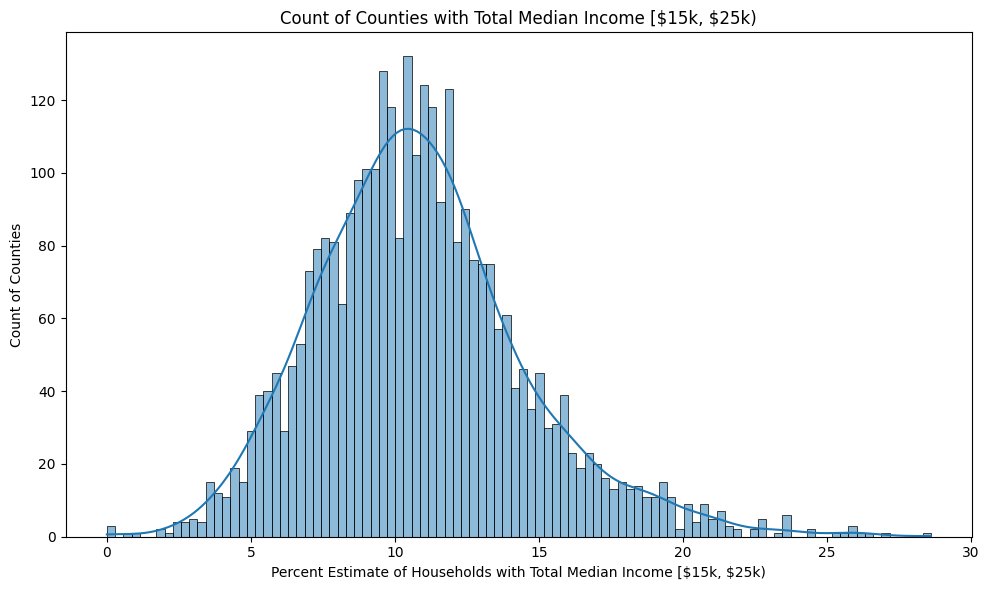

In [13]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=median_income_formatted, x='S1901_C01_004E', bins=100, kde=True)

# Labeling
plt.xlabel('Percent Estimate of Households with Total Median Income [\$15k, \$25k)')
plt.ylabel('Count of Counties')
plt.title('Count of Counties with Total Median Income [\$15k, \$25k)')

# Display the plot
plt.tight_layout()
plt.show()



----- S1901_C01_001E -----
This column represents: 'Estimate!!Households!!Total'
count    3.221000e+03
mean     3.836075e+04
std      1.167448e+05
min      6.200000e+01
25%      4.371000e+03
50%      1.005900e+04
75%      2.582200e+04
max      3.332504e+06
Name: S1901_C01_001E, dtype: float64
Unique values: 3034
Missing: 0


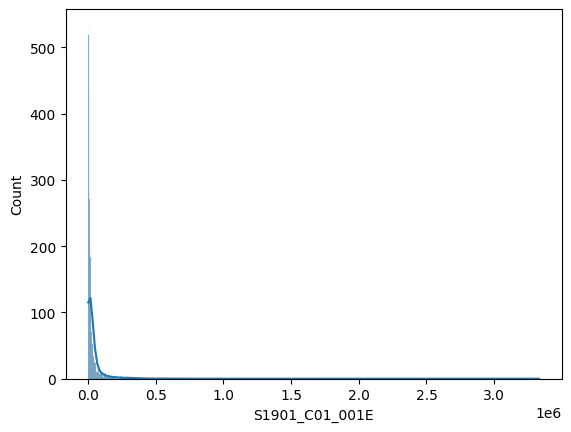


----- S1901_C01_002E -----
This column represents: 'Estimate!!Households!!Total!!Less than $10,000'
count    3221.000000
mean        7.260820
std         4.716247
min         0.000000
25%         4.500000
50%         6.100000
75%         8.500000
max        42.400000
Name: S1901_C01_002E, dtype: float64
Unique values: 258
Missing: 0


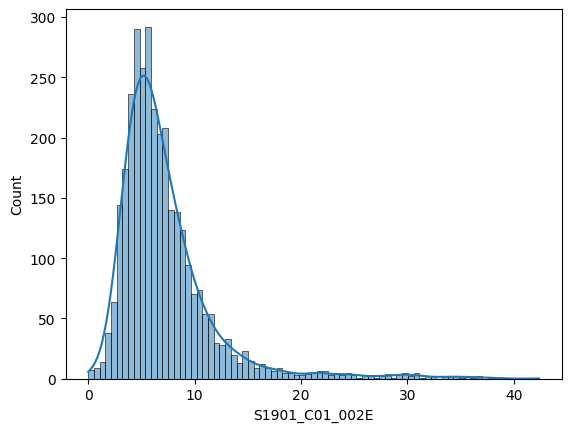


----- S1901_C01_003E -----
This column represents: 'Estimate!!Households!!Total!!$10,000 to $14,999'
count    3221.000000
mean        5.508569
std         2.603807
min         0.000000
25%         3.700000
50%         5.000000
75%         6.800000
max        26.600000
Name: S1901_C01_003E, dtype: float64
Unique values: 157
Missing: 0


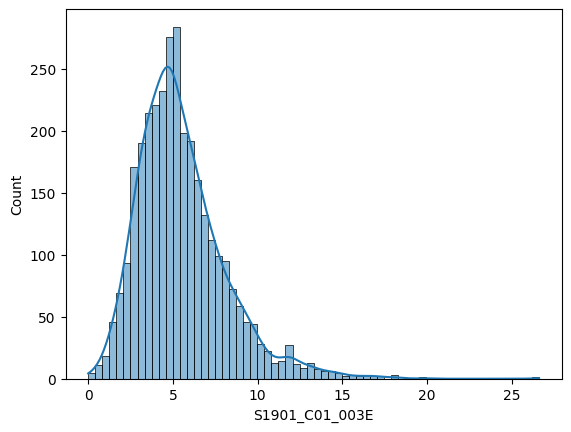


----- S1901_C01_004E -----
This column represents: 'Estimate!!Households!!Total!!$15,000 to $24,999'
count    3221.000000
mean       10.873921
std         3.678780
min         0.000000
25%         8.400000
50%        10.600000
75%        12.800000
max        28.600000
Name: S1901_C01_004E, dtype: float64
Unique values: 217
Missing: 0


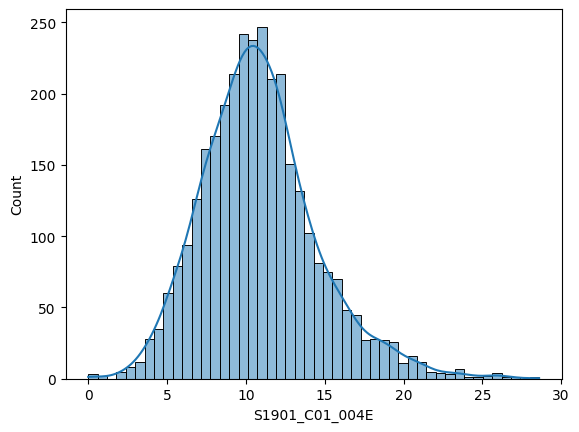


----- S1901_C01_005E -----
This column represents: 'Estimate!!Households!!Total!!$25,000 to $34,999'
count    3221.000000
mean       10.429152
std         2.757603
min         0.000000
25%         8.800000
50%        10.400000
75%        12.000000
max        39.500000
Name: S1901_C01_005E, dtype: float64
Unique values: 175
Missing: 0


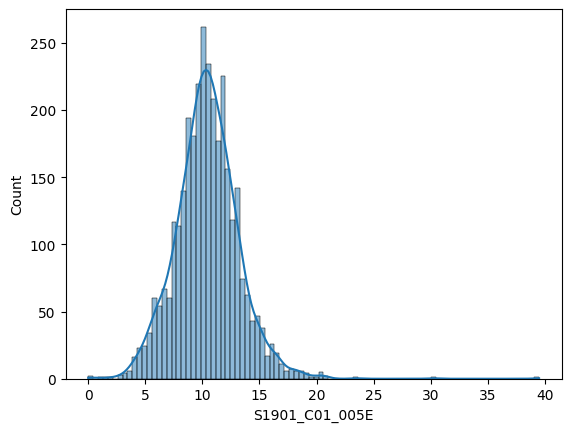


----- S1901_C01_006E -----
This column represents: 'Estimate!!Households!!Total!!$35,000 to $49,999'
count    3221.000000
mean       13.741509
std         3.071478
min         0.700000
25%        12.100000
50%        13.700000
75%        15.300000
max        77.400000
Name: S1901_C01_006E, dtype: float64
Unique values: 190
Missing: 0


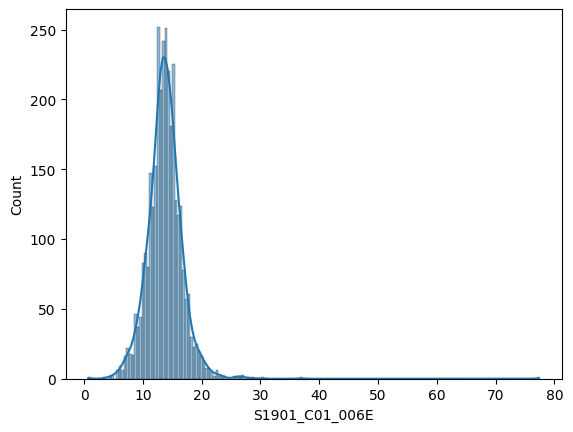


----- S1901_C01_007E -----
This column represents: 'Estimate!!Households!!Total!!$50,000 to $74,999'
count    3221.000000
mean       18.210276
std         3.348233
min         3.200000
25%        16.600000
50%        18.400000
75%        20.100000
max        38.800000
Name: S1901_C01_007E, dtype: float64
Unique values: 223
Missing: 0


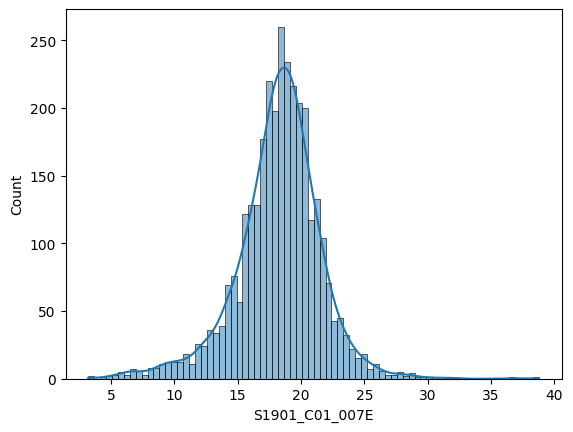


----- S1901_C01_008E -----
This column represents: 'Estimate!!Households!!Total!!$75,000 to $99,999'
count    3221.000000
mean       12.422974
std         3.241618
min         0.000000
25%        10.800000
50%        12.700000
75%        14.300000
max        77.100000
Name: S1901_C01_008E, dtype: float64
Unique values: 200
Missing: 0


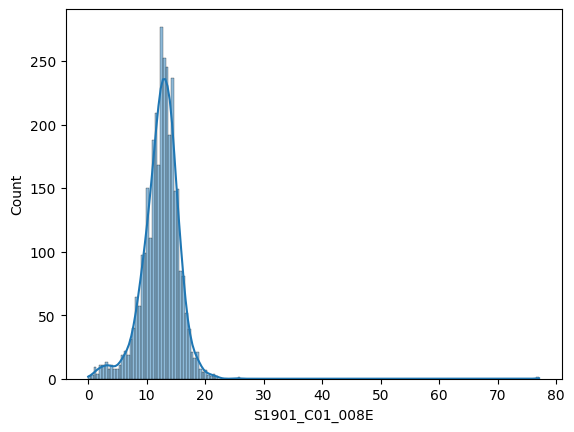


----- S1901_C01_009E -----
This column represents: 'Estimate!!Households!!Total!!$100,000 to $149,999'
count    3221.000000
mean       12.987054
std         4.450215
min         0.000000
25%        10.200000
50%        12.900000
75%        15.800000
max        33.100000
Name: S1901_C01_009E, dtype: float64
Unique values: 254
Missing: 0


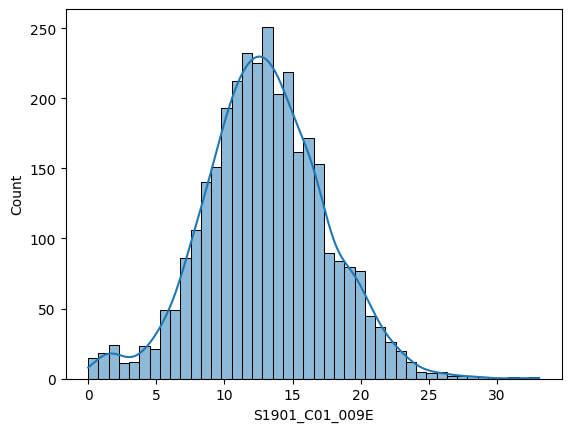


----- S1901_C01_010E -----
This column represents: 'Estimate!!Households!!Total!!$150,000 to $199,999'
count    3221.000000
mean        4.546414
std         2.687223
min         0.000000
25%         2.800000
50%         4.100000
75%         5.700000
max        18.900000
Name: S1901_C01_010E, dtype: float64
Unique values: 154
Missing: 0


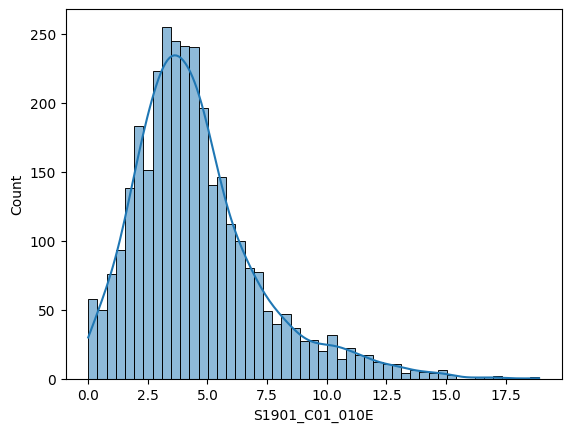


----- S1901_C01_011E -----
This column represents: 'Estimate!!Households!!Total!!$200,000 or more'
count    3221.000000
mean        4.018348
std         3.559077
min         0.000000
25%         2.000000
50%         3.100000
75%         4.800000
max        32.500000
Name: S1901_C01_011E, dtype: float64
Unique values: 197
Missing: 0


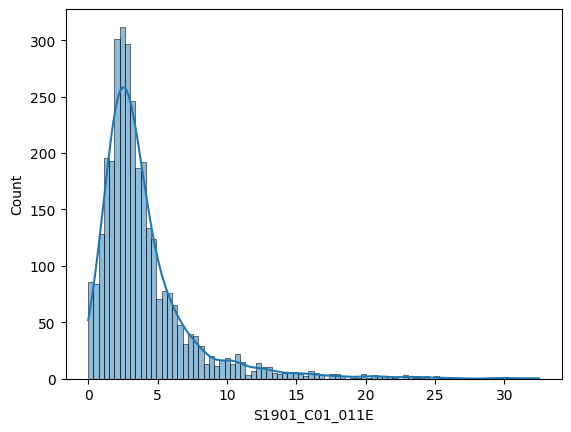


----- S1901_C01_012E -----
This column represents: 'Estimate!!Households!!Median income (dollars)'
count      3220.000000
mean      54171.514596
std       15482.258850
min       12283.000000
25%       44939.000000
50%       52381.000000
75%       61241.750000
max      147111.000000
Name: S1901_C01_012E, dtype: float64
Unique values: 3098
Missing: 1


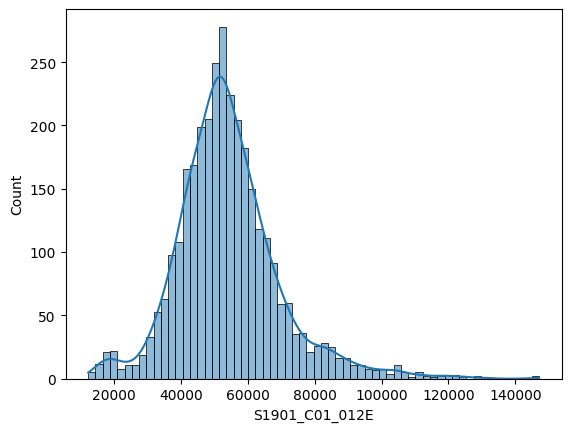


----- S1901_C01_013E -----
This column represents: 'Estimate!!Households!!Mean income (dollars)'
count      3221.000000
mean      71213.765601
std       19126.250373
min       16914.000000
25%       60529.000000
50%       68329.000000
75%       78975.000000
max      183898.000000
Name: S1901_C01_013E, dtype: float64
Unique values: 3121
Missing: 0


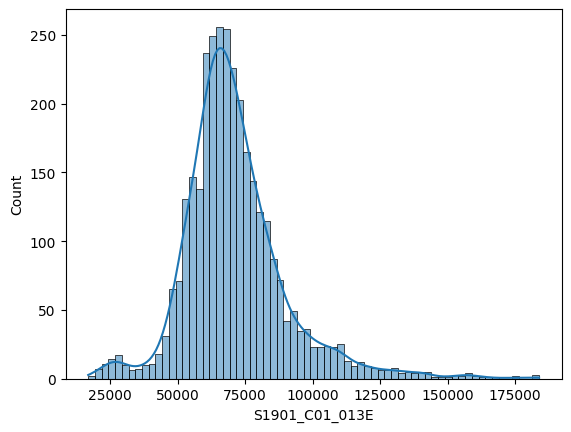


----- S1901_C01_014E -----
This column represents: 'Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months'
count    3221.000000
mean       36.619435
std         7.140410
min         1.600000
25%        31.900000
50%        35.700000
75%        40.200000
max        78.300000
Name: S1901_C01_014E, dtype: float64
Unique values: 389
Missing: 0


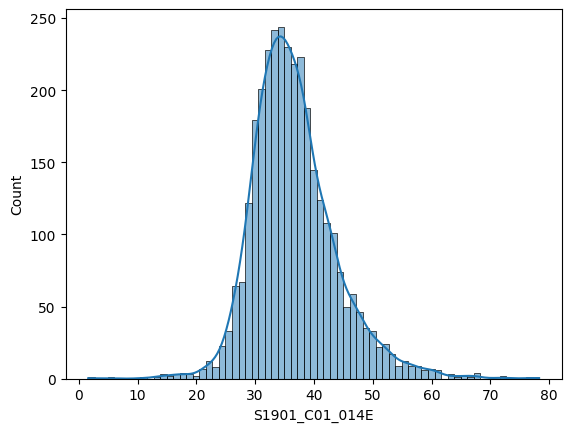


----- S1901_C01_015E -----
This column represents: 'Estimate!!Households!!PERCENT ALLOCATED!!Family income in the past 12 months'
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: S1901_C01_015E, dtype: float64
Unique values: 0
Missing: 3221


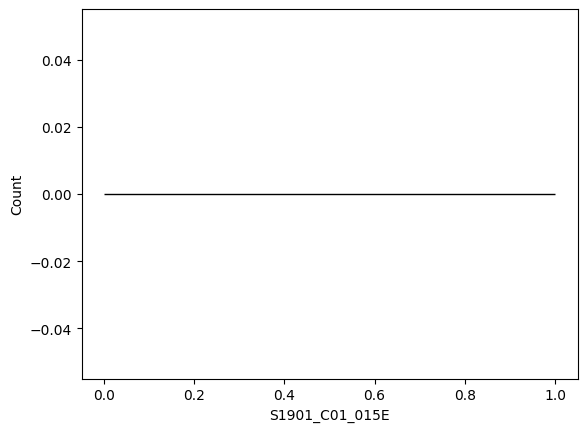


----- S1901_C01_016E -----
This column represents: 'Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months'
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: S1901_C01_016E, dtype: float64
Unique values: 0
Missing: 3221


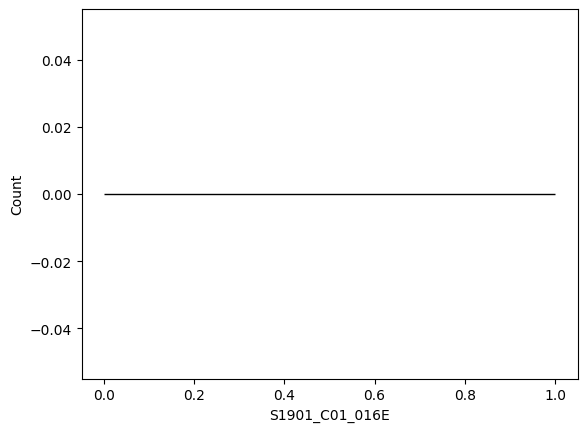


----- S1901_C02_001E -----
This column represents: 'Estimate!!Families!!Total'
count    3.221000e+03
mean     2.504201e+04
std      7.585416e+04
min      1.800000e+01
25%      2.875000e+03
50%      6.671000e+03
75%      1.721700e+04
max      2.211342e+06
Name: S1901_C02_001E, dtype: float64
Unique values: 3002
Missing: 0


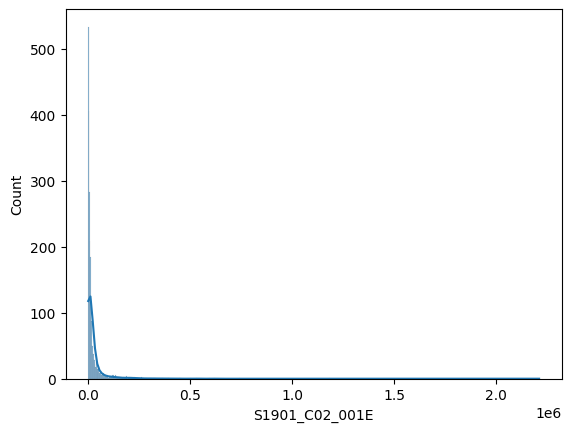


----- S1901_C02_002E -----
This column represents: 'Estimate!!Families!!Total!!Less than $10,000'
count    3221.000000
mean        4.492425
std         3.943173
min         0.000000
25%         2.400000
50%         3.500000
75%         5.300000
max        39.700000
Name: S1901_C02_002E, dtype: float64
Unique values: 207
Missing: 0


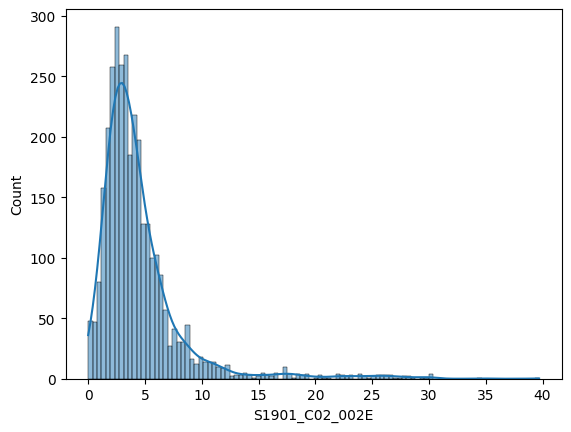


----- S1901_C02_003E -----
This column represents: 'Estimate!!Families!!Total!!$10,000 to $14,999'
count    3221.000000
mean        2.840112
std         2.175614
min         0.000000
25%         1.500000
50%         2.400000
75%         3.500000
max        20.400000
Name: S1901_C02_003E, dtype: float64
Unique values: 135
Missing: 0


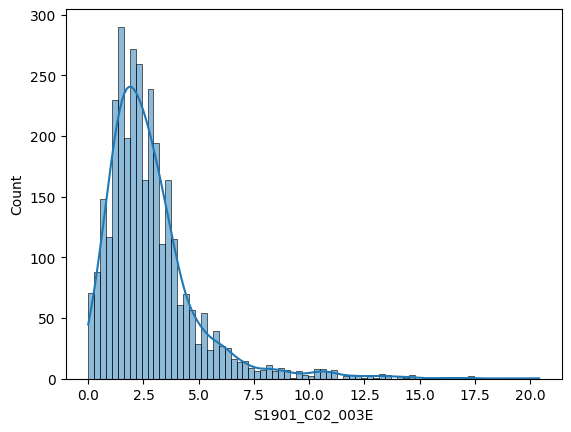


----- S1901_C02_004E -----
This column represents: 'Estimate!!Families!!Total!!$15,000 to $24,999'
count    3221.000000
mean        7.443030
std         3.952083
min         0.000000
25%         4.800000
50%         6.600000
75%         9.200000
max        30.800000
Name: S1901_C02_004E, dtype: float64
Unique values: 225
Missing: 0


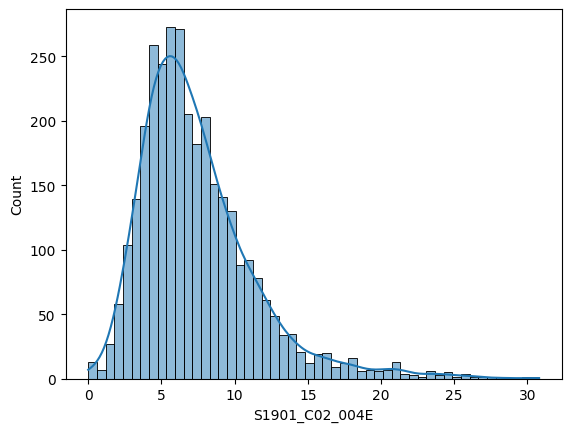


----- S1901_C02_005E -----
This column represents: 'Estimate!!Families!!Total!!$25,000 to $34,999'
count    3221.000000
mean        8.954735
std         3.335925
min         0.000000
25%         6.700000
50%         8.700000
75%        10.800000
max        29.500000
Name: S1901_C02_005E, dtype: float64
Unique values: 196
Missing: 0


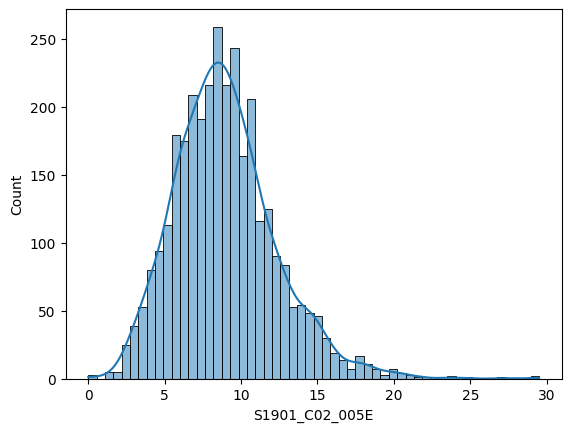


----- S1901_C02_006E -----
This column represents: 'Estimate!!Families!!Total!!$35,000 to $49,999'
count    3221.000000
mean       13.232474
std         3.588504
min         0.000000
25%        11.000000
50%        13.200000
75%        15.200000
max        44.400000
Name: S1901_C02_006E, dtype: float64
Unique values: 218
Missing: 0


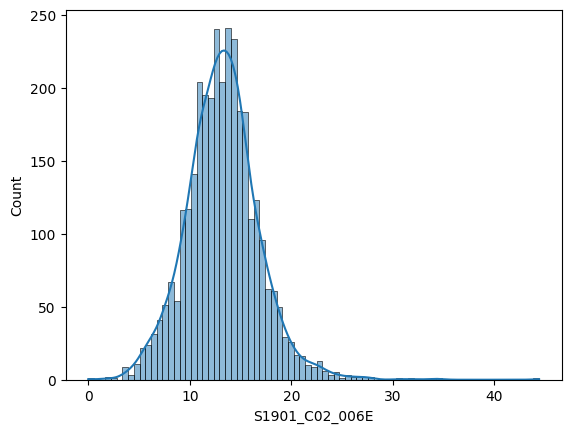


----- S1901_C02_007E -----
This column represents: 'Estimate!!Families!!Total!!$50,000 to $74,999'
count    3221.000000
mean       19.858740
std         4.106322
min         0.000000
25%        17.600000
50%        20.100000
75%        22.300000
max        41.300000
Name: S1901_C02_007E, dtype: float64
Unique values: 254
Missing: 0


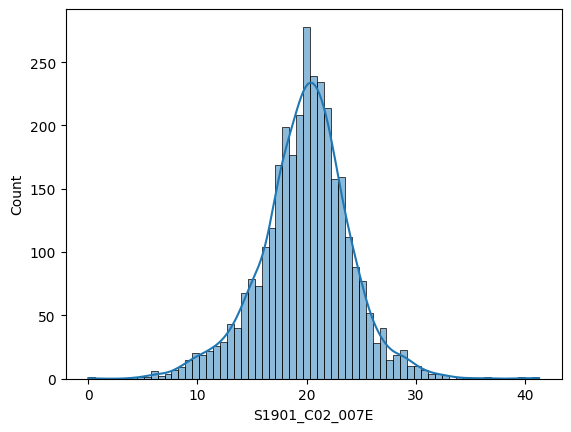


----- S1901_C02_008E -----
This column represents: 'Estimate!!Families!!Total!!$75,000 to $99,999'
count    3221.000000
mean       15.087488
std         4.024830
min         0.000000
25%        13.200000
50%        15.300000
75%        17.300000
max        95.700000
Name: S1901_C02_008E, dtype: float64
Unique values: 247
Missing: 0


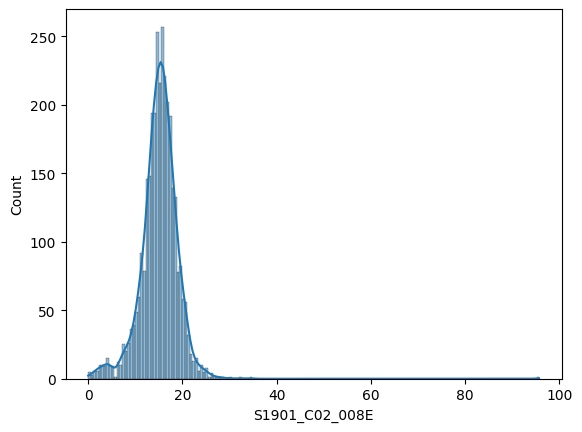


----- S1901_C02_009E -----
This column represents: 'Estimate!!Families!!Total!!$100,000 to $149,999'
count    3221.000000
mean       16.798789
std         5.310444
min         0.000000
25%        13.400000
50%        16.900000
75%        20.300000
max        44.400000
Name: S1901_C02_009E, dtype: float64
Unique values: 287
Missing: 0


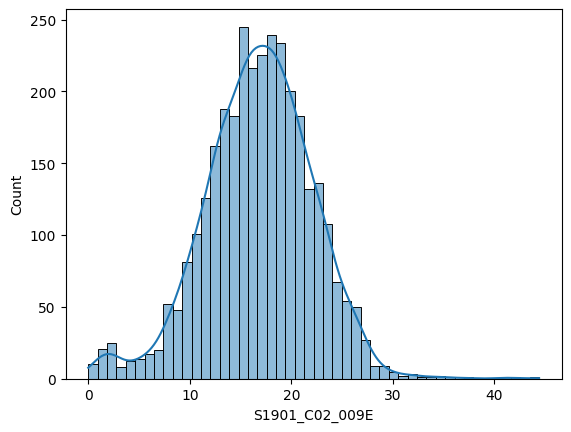


----- S1901_C02_010E -----
This column represents: 'Estimate!!Families!!Total!!$150,000 to $199,999'
count    3221.000000
mean        6.014157
std         3.363291
min         0.000000
25%         3.700000
50%         5.500000
75%         7.700000
max        22.000000
Name: S1901_C02_010E, dtype: float64
Unique values: 180
Missing: 0


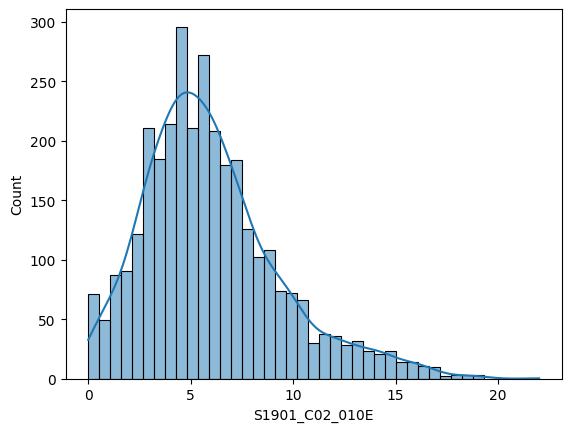


----- S1901_C02_011E -----
This column represents: 'Estimate!!Families!!Total!!$200,000 or more'
count    3221.000000
mean        5.278889
std         4.599373
min         0.000000
25%         2.600000
50%         4.000000
75%         6.300000
max        44.200000
Name: S1901_C02_011E, dtype: float64
Unique values: 233
Missing: 0


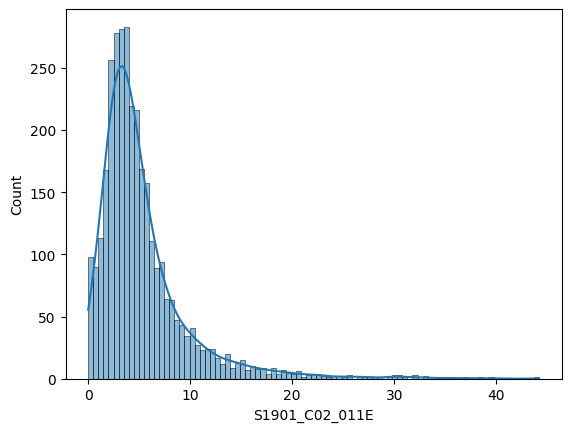


----- S1901_C02_012E -----
This column represents: 'Estimate!!Families!!Median income (dollars)'
count      3220.000000
mean      67463.473602
std       18039.674642
min       15478.000000
25%       56872.000000
50%       65763.000000
75%       76110.000000
max      182567.000000
Name: S1901_C02_012E, dtype: float64
Unique values: 3074
Missing: 1


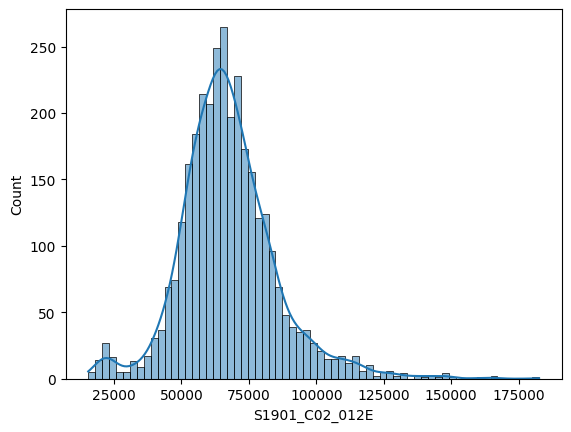


----- S1901_C02_013E -----
This column represents: 'Estimate!!Families!!Mean income (dollars)'
count      3221.000000
mean      83989.573735
std       22303.218193
min       19989.000000
25%       71228.000000
50%       81018.000000
75%       93246.000000
max      223262.000000
Name: S1901_C02_013E, dtype: float64
Unique values: 3150
Missing: 0


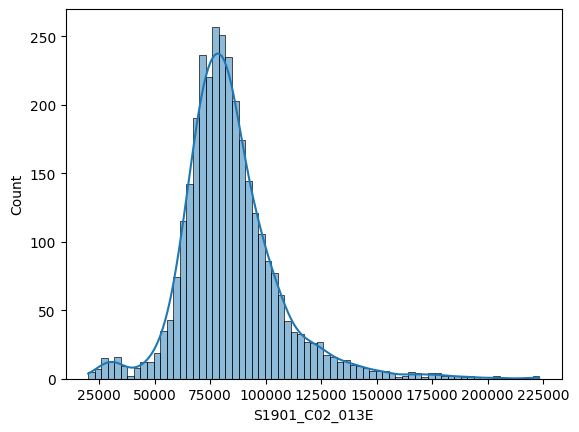


----- S1901_C02_014E -----
This column represents: 'Estimate!!Families!!PERCENT ALLOCATED!!Household income in the past 12 months'
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: S1901_C02_014E, dtype: float64
Unique values: 0
Missing: 3221


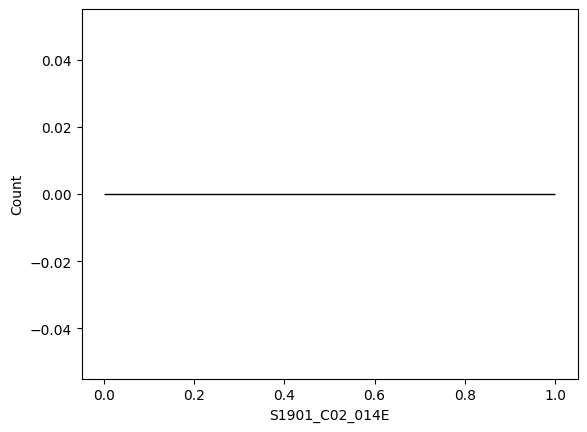


----- S1901_C02_015E -----
This column represents: 'Estimate!!Families!!PERCENT ALLOCATED!!Family income in the past 12 months'
count    3221.000000
mean       37.291897
std         7.792489
min         1.800000
25%        32.100000
50%        36.200000
75%        41.200000
max        78.200000
Name: S1901_C02_015E, dtype: float64
Unique values: 408
Missing: 0


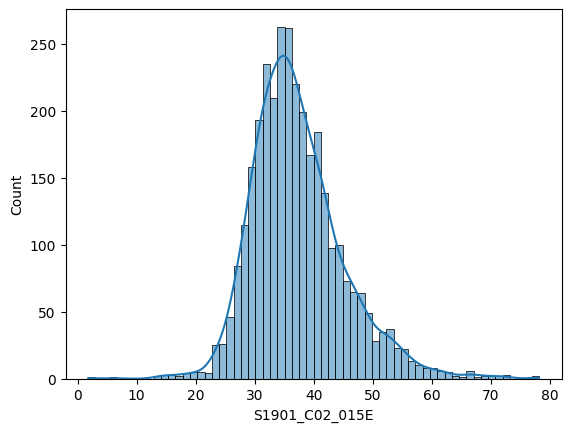


----- S1901_C02_016E -----
This column represents: 'Estimate!!Families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months'
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: S1901_C02_016E, dtype: float64
Unique values: 0
Missing: 3221


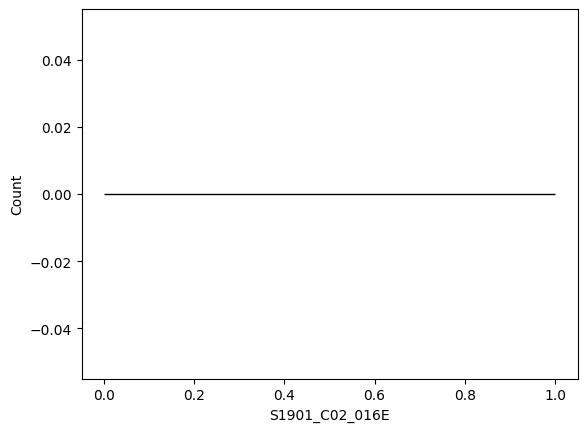


----- S1901_C03_001E -----
This column represents: 'Estimate!!Married-couple families!!Total'
count    3.221000e+03
mean     1.839726e+04
std      5.354452e+04
min      1.800000e+01
25%      2.171000e+03
50%      4.982000e+03
75%      1.267100e+04
max      1.493670e+06
Name: S1901_C03_001E, dtype: float64
Unique values: 2937
Missing: 0


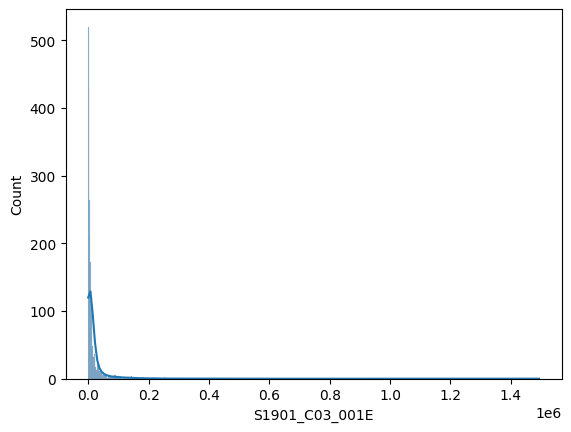


----- S1901_C03_002E -----
This column represents: 'Estimate!!Married-couple families!!Total!!Less than $10,000'
count    3221.000000
mean        1.921267
std         2.334640
min         0.000000
25%         0.800000
50%         1.300000
75%         2.100000
max        33.900000
Name: S1901_C03_002E, dtype: float64
Unique values: 137
Missing: 0


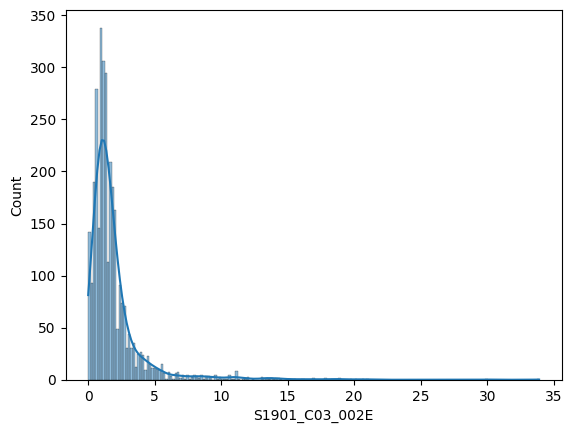


----- S1901_C03_003E -----
This column represents: 'Estimate!!Married-couple families!!Total!!$10,000 to $14,999'
count    3221.000000
mean        1.601770
std         1.886034
min         0.000000
25%         0.600000
50%         1.100000
75%         1.900000
max        21.100000
Name: S1901_C03_003E, dtype: float64
Unique values: 119
Missing: 0


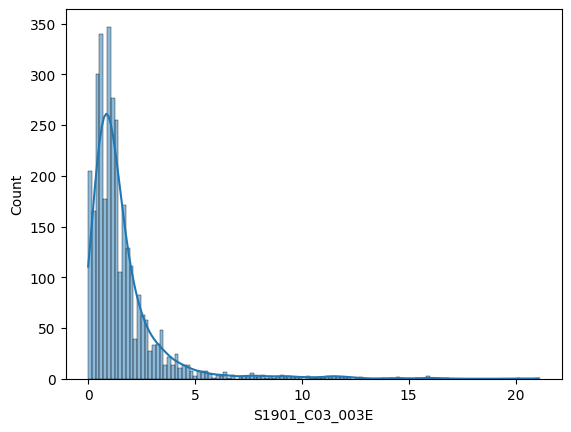


----- S1901_C03_004E -----
This column represents: 'Estimate!!Married-couple families!!Total!!$15,000 to $24,999'
count    3221.000000
mean        5.112325
std         3.794535
min         0.000000
25%         2.800000
50%         4.200000
75%         6.200000
max        34.700000
Name: S1901_C03_004E, dtype: float64
Unique values: 211
Missing: 0


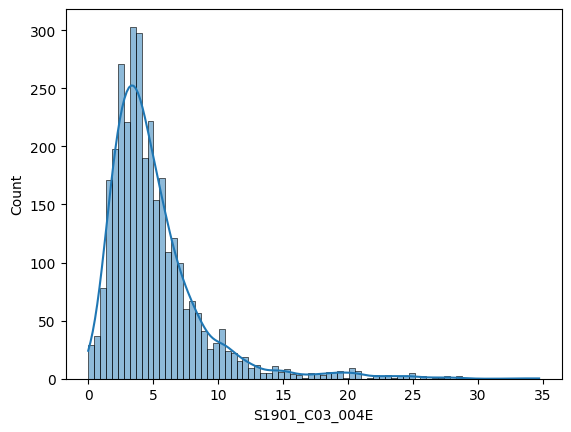


----- S1901_C03_005E -----
This column represents: 'Estimate!!Married-couple families!!Total!!$25,000 to $34,999'
count    3221.000000
mean        7.312884
std         3.582009
min         0.000000
25%         4.800000
50%         6.700000
75%         9.100000
max        30.000000
Name: S1901_C03_005E, dtype: float64
Unique values: 204
Missing: 0


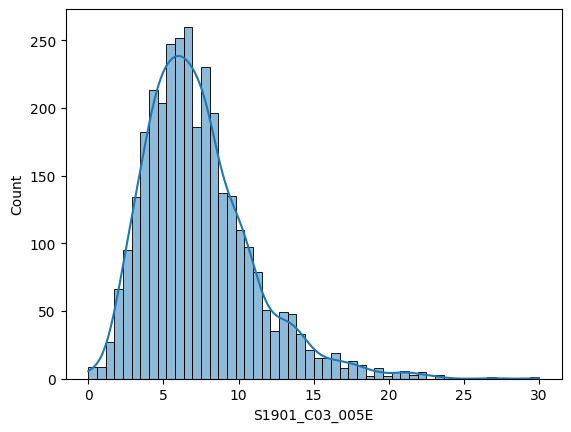


----- S1901_C03_006E -----
This column represents: 'Estimate!!Married-couple families!!Total!!$35,000 to $49,999'
count    3221.000000
mean       12.214250
std         4.233266
min         0.000000
25%         9.400000
50%        12.100000
75%        14.600000
max        60.900000
Name: S1901_C03_006E, dtype: float64
Unique values: 237
Missing: 0


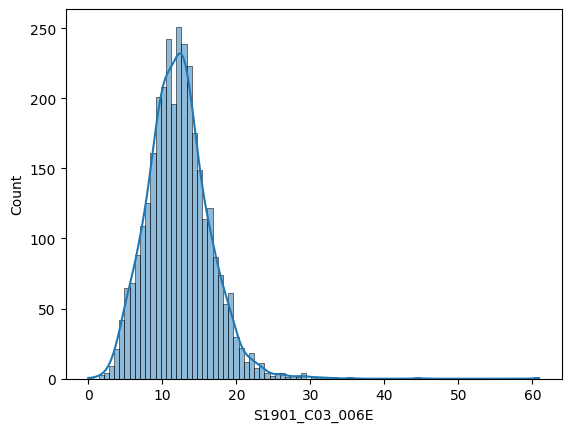


----- S1901_C03_007E -----
This column represents: 'Estimate!!Married-couple families!!Total!!$50,000 to $74,999'
count    3221.000000
mean       20.651195
std         4.793416
min         0.000000
25%        17.900000
50%        20.900000
75%        23.600000
max        53.000000
Name: S1901_C03_007E, dtype: float64
Unique values: 278
Missing: 0


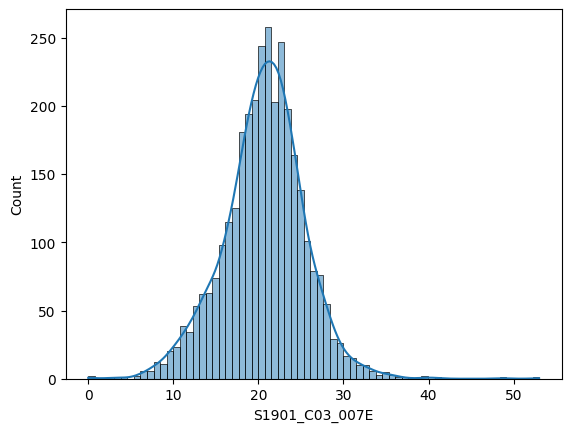


----- S1901_C03_008E -----
This column represents: 'Estimate!!Married-couple families!!Total!!$75,000 to $99,999'
count    3221.00000
mean       17.21425
std         4.42259
min         0.00000
25%        15.00000
50%        17.50000
75%        19.60000
max        95.70000
Name: S1901_C03_008E, dtype: float64
Unique values: 260
Missing: 0


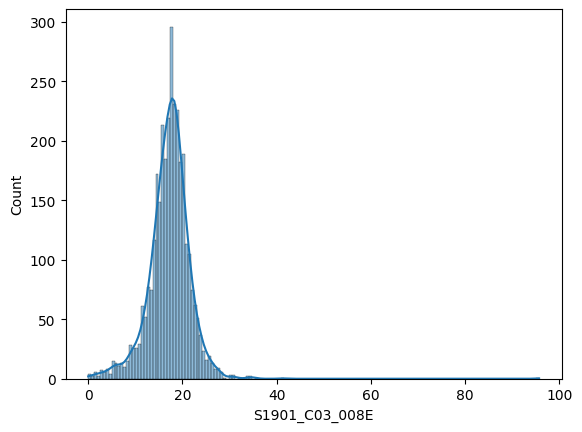


----- S1901_C03_009E -----
This column represents: 'Estimate!!Married-couple families!!Total!!$100,000 to $149,999'
count    3221.000000
mean       20.090934
std         5.802381
min         0.000000
25%        16.700000
50%        20.600000
75%        24.000000
max        44.400000
Name: S1901_C03_009E, dtype: float64
Unique values: 316
Missing: 0


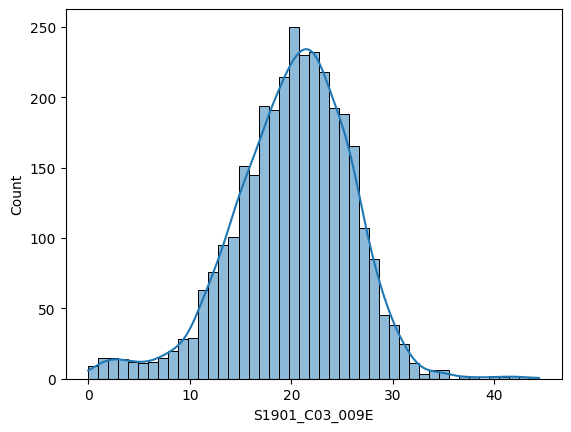


----- S1901_C03_010E -----
This column represents: 'Estimate!!Married-couple families!!Total!!$150,000 to $199,999'
count    3221.000000
mean        7.373300
std         3.927817
min         0.000000
25%         4.700000
50%         6.800000
75%         9.600000
max        27.900000
Name: S1901_C03_010E, dtype: float64
Unique values: 203
Missing: 0


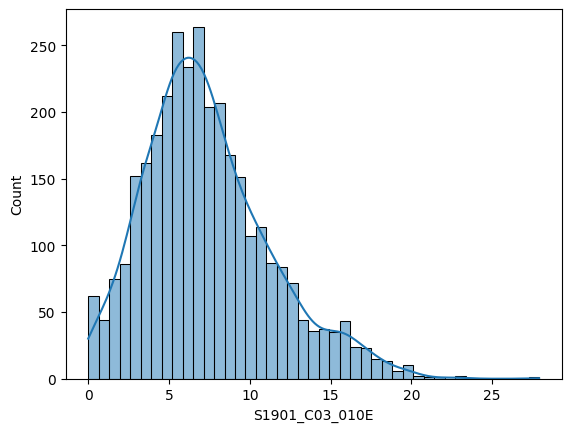


----- S1901_C03_011E -----
This column represents: 'Estimate!!Married-couple families!!Total!!$200,000 or more'
count    3221.000000
mean        6.505557
std         5.554471
min         0.000000
25%         3.300000
50%         5.000000
75%         7.800000
max        52.900000
Name: S1901_C03_011E, dtype: float64
Unique values: 279
Missing: 0


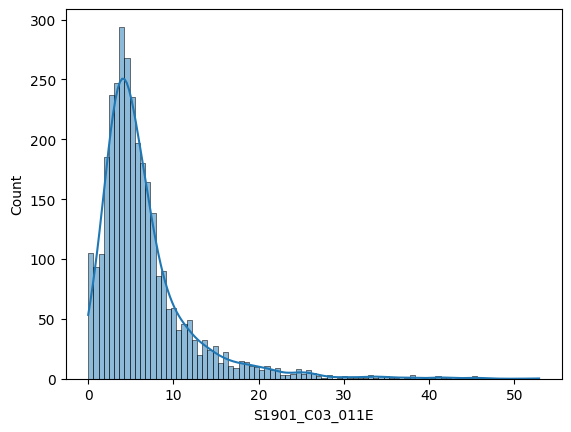


----- S1901_C03_012E -----
This column represents: 'Estimate!!Married-couple families!!Median income (dollars)'
count      3220.000000
mean      78399.800311
std       19401.354000
min       17139.000000
25%       67132.750000
50%       76450.500000
75%       86989.750000
max      205773.000000
Name: S1901_C03_012E, dtype: float64
Unique values: 3075
Missing: 1


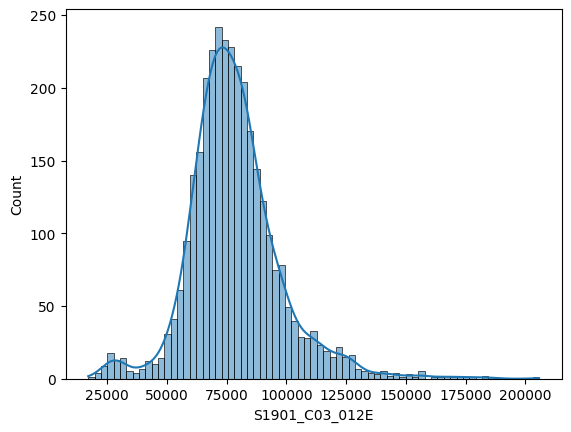


----- S1901_C03_013E -----
This column represents: 'Estimate!!Married-couple families!!Mean income (dollars)'
count      1049.000000
mean     107899.825548
std       26784.616675
min       35609.000000
25%       90501.000000
50%      102502.000000
75%      119431.000000
max      284332.000000
Name: S1901_C03_013E, dtype: float64
Unique values: 1047
Missing: 2172


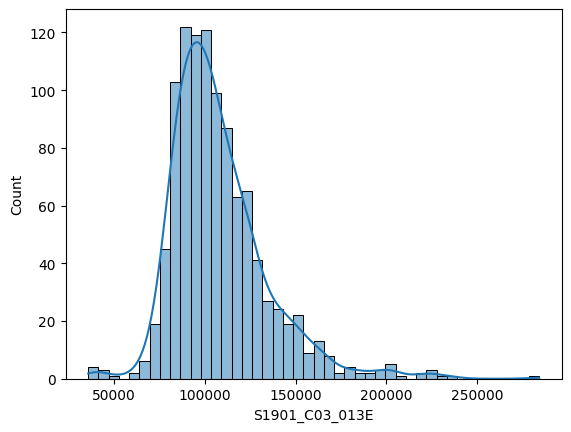


----- S1901_C03_014E -----
This column represents: 'Estimate!!Married-couple families!!PERCENT ALLOCATED!!Household income in the past 12 months'
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: S1901_C03_014E, dtype: float64
Unique values: 0
Missing: 3221


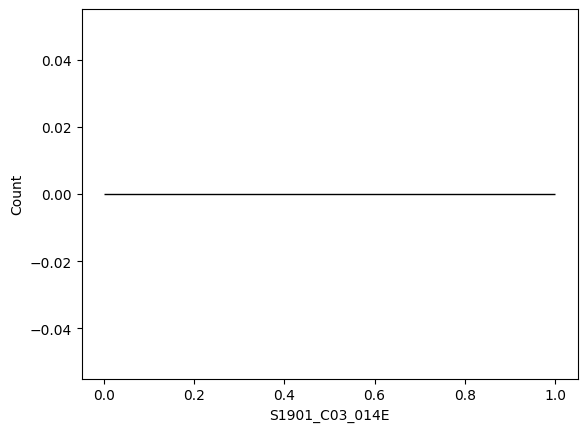


----- S1901_C03_015E -----
This column represents: 'Estimate!!Married-couple families!!PERCENT ALLOCATED!!Family income in the past 12 months'
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: S1901_C03_015E, dtype: float64
Unique values: 0
Missing: 3221


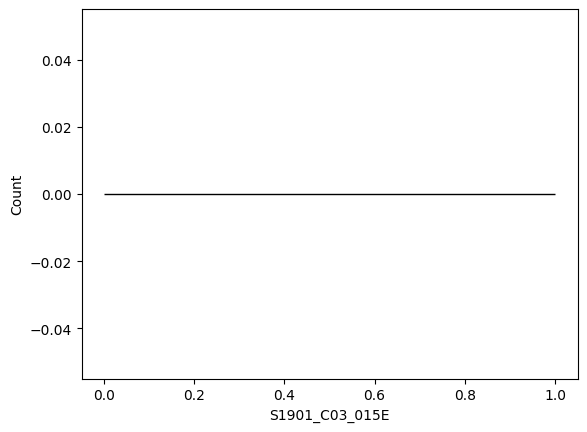


----- S1901_C03_016E -----
This column represents: 'Estimate!!Married-couple families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months'
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: S1901_C03_016E, dtype: float64
Unique values: 0
Missing: 3221


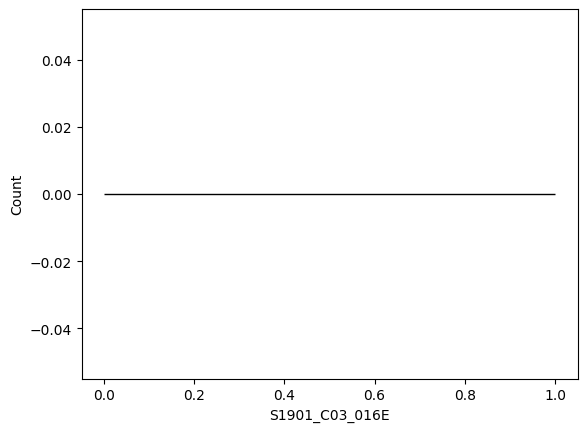


----- S1901_C04_001E -----
This column represents: 'Estimate!!Nonfamily households!!Total'
count    3.221000e+03
mean     1.331873e+04
std      4.176100e+04
min      1.400000e+01
25%      1.448000e+03
50%      3.292000e+03
75%      8.754000e+03
max      1.121162e+06
Name: S1901_C04_001E, dtype: float64
Unique values: 2813
Missing: 0


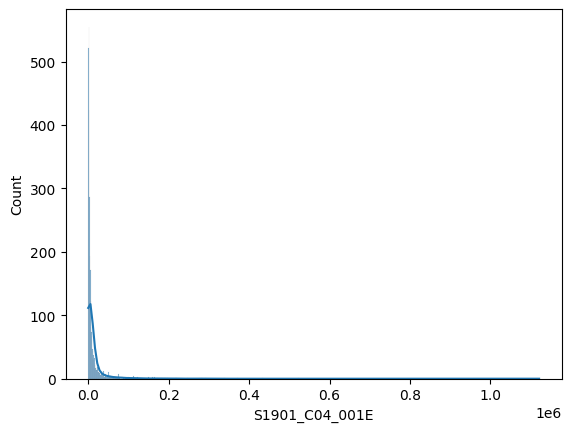


----- S1901_C04_002E -----
This column represents: 'Estimate!!Nonfamily households!!Total!!Less than $10,000'
count    3221.00000
mean       13.92968
std         7.71444
min         0.00000
25%         9.20000
50%        12.10000
75%        16.60000
max        69.80000
Name: S1901_C04_002E, dtype: float64
Unique values: 373
Missing: 0


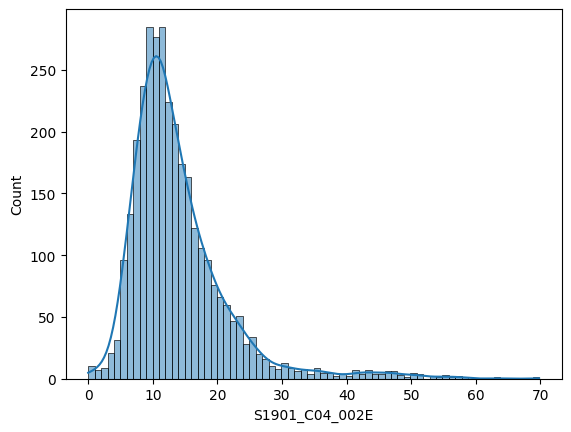


----- S1901_C04_003E -----
This column represents: 'Estimate!!Nonfamily households!!Total!!$10,000 to $14,999'
count    3221.000000
mean       11.112791
std         4.792807
min         0.000000
25%         7.700000
50%        10.300000
75%        13.800000
max        41.000000
Name: S1901_C04_003E, dtype: float64
Unique values: 263
Missing: 0


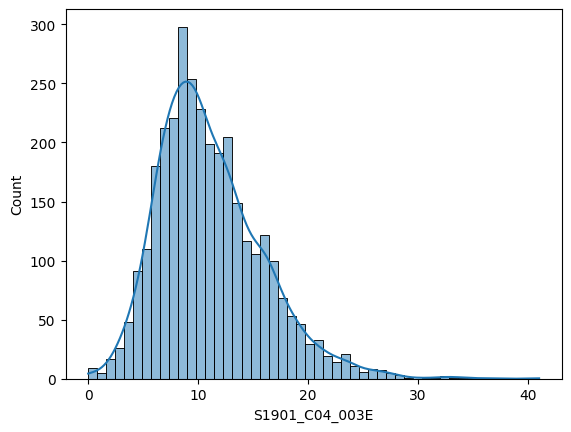


----- S1901_C04_004E -----
This column represents: 'Estimate!!Nonfamily households!!Total!!$15,000 to $24,999'
count    3221.000000
mean       18.281807
std         5.320875
min         0.000000
25%        14.900000
50%        18.100000
75%        21.300000
max        48.800000
Name: S1901_C04_004E, dtype: float64
Unique values: 303
Missing: 0


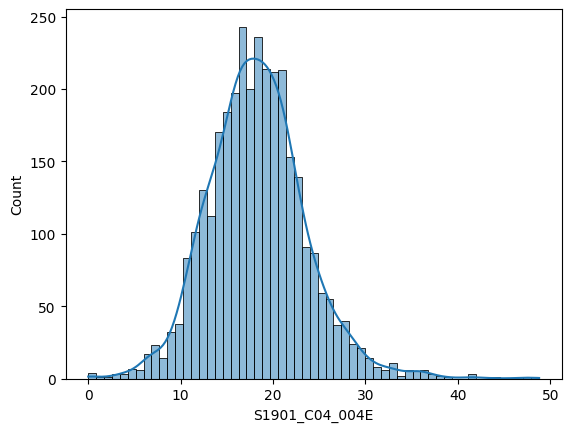


----- S1901_C04_005E -----
This column represents: 'Estimate!!Nonfamily households!!Total!!$25,000 to $34,999'
count    3221.000000
mean       13.802204
std         4.317337
min         0.000000
25%        11.400000
50%        13.700000
75%        15.900000
max        71.400000
Name: S1901_C04_005E, dtype: float64
Unique values: 257
Missing: 0


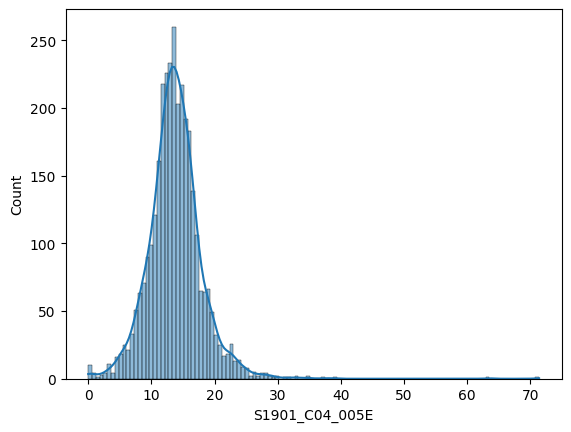


----- S1901_C04_006E -----
This column represents: 'Estimate!!Nonfamily households!!Total!!$35,000 to $49,999'
count    3221.000000
mean       14.803912
std         4.833724
min         0.000000
25%        12.200000
50%        14.800000
75%        17.100000
max        90.900000
Name: S1901_C04_006E, dtype: float64
Unique values: 284
Missing: 0


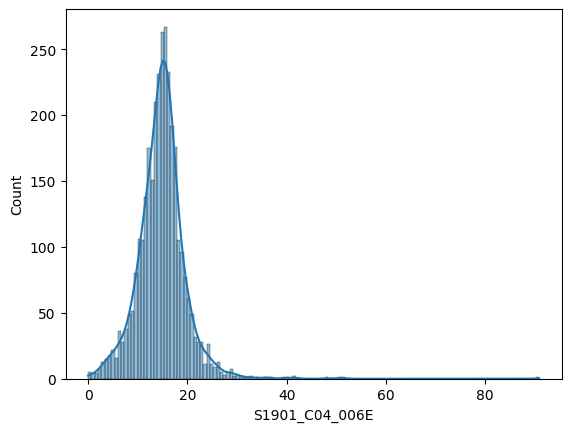


----- S1901_C04_007E -----
This column represents: 'Estimate!!Nonfamily households!!Total!!$50,000 to $74,999'
count    3221.000000
mean       14.361875
std         5.210051
min         0.000000
25%        11.200000
50%        14.700000
75%        17.700000
max        53.100000
Name: S1901_C04_007E, dtype: float64
Unique values: 282
Missing: 0


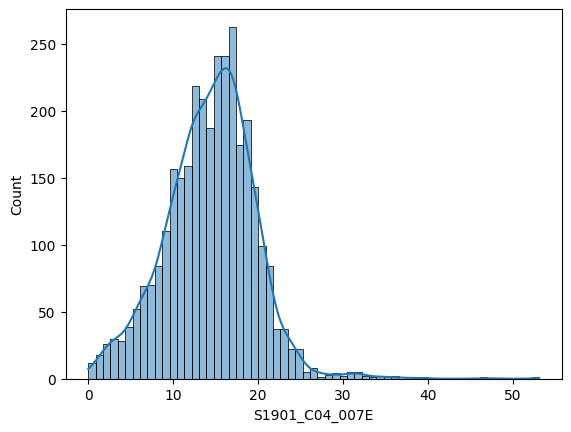


----- S1901_C04_008E -----
This column represents: 'Estimate!!Nonfamily households!!Total!!$75,000 to $99,999'
count    3221.000000
mean        6.453027
std         3.542543
min         0.000000
25%         4.000000
50%         6.200000
75%         8.600000
max        55.600000
Name: S1901_C04_008E, dtype: float64
Unique values: 179
Missing: 0


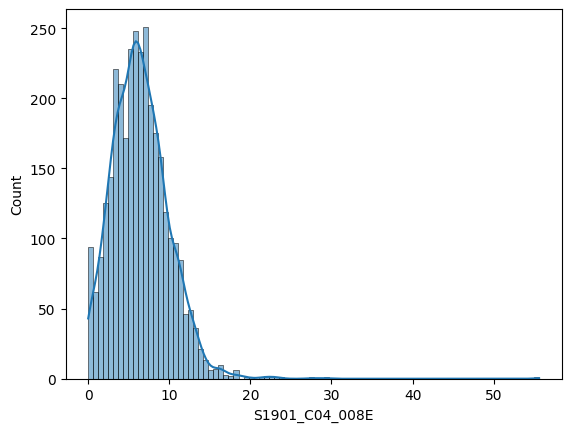


----- S1901_C04_009E -----
This column represents: 'Estimate!!Nonfamily households!!Total!!$100,000 to $149,999'
count    3221.000000
mean        4.635455
std         3.449287
min         0.000000
25%         2.200000
50%         4.000000
75%         6.200000
max        29.700000
Name: S1901_C04_009E, dtype: float64
Unique values: 183
Missing: 0


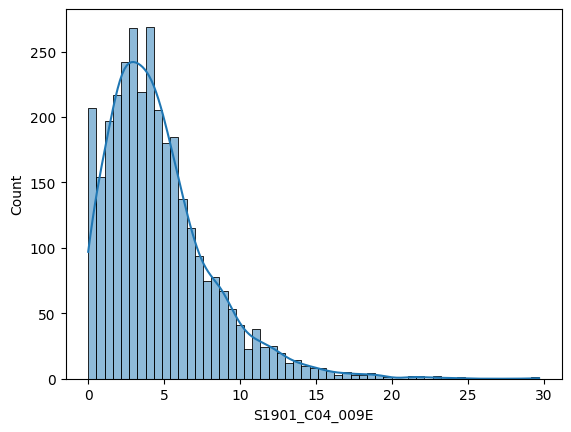


----- S1901_C04_010E -----
This column represents: 'Estimate!!Nonfamily households!!Total!!$150,000 to $199,999'
count    3221.000000
mean        1.316982
std         1.590529
min         0.000000
25%         0.300000
50%         0.900000
75%         1.800000
max        18.900000
Name: S1901_C04_010E, dtype: float64
Unique values: 96
Missing: 0


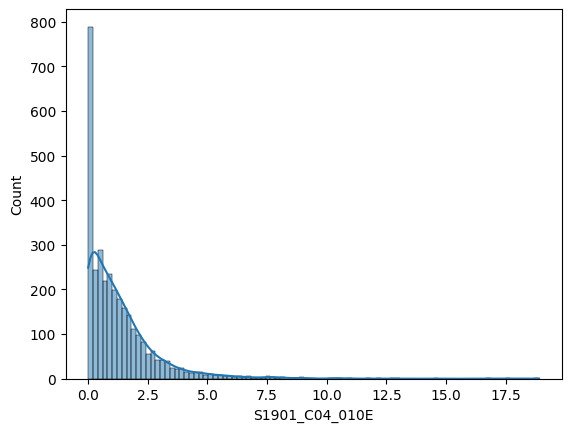


----- S1901_C04_011E -----
This column represents: 'Estimate!!Nonfamily households!!Total!!$200,000 or more'
count    3221.000000
mean        1.303819
std         1.581962
min         0.000000
25%         0.300000
50%         0.900000
75%         1.700000
max        22.900000
Name: S1901_C04_011E, dtype: float64
Unique values: 98
Missing: 0


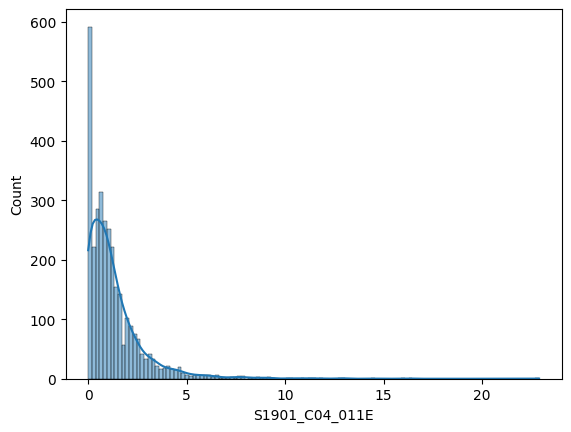


----- S1901_C04_012E -----
This column represents: 'Estimate!!Nonfamily households!!Median income (dollars)'
count     3208.000000
mean     30964.596322
std       9933.573459
min       4783.000000
25%      24537.000000
50%      30304.000000
75%      35667.500000
max      96421.000000
Name: S1901_C04_012E, dtype: float64
Unique values: 2995
Missing: 13


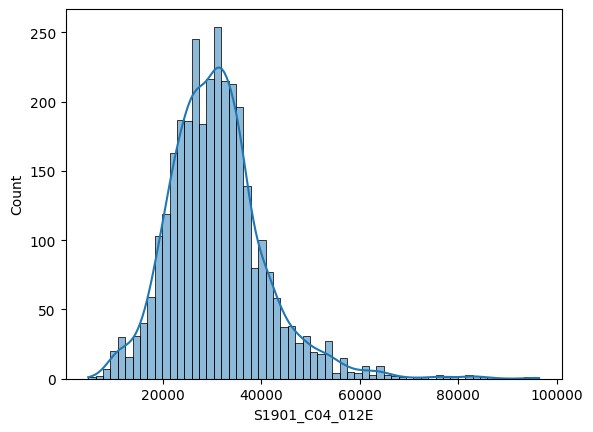


----- S1901_C04_013E -----
This column represents: 'Estimate!!Nonfamily households!!Mean income (dollars)'
count      3220.000000
mean      43182.081988
std       13157.568582
min        8360.000000
25%       35274.750000
50%       41571.000000
75%       48795.500000
max      141934.000000
Name: S1901_C04_013E, dtype: float64
Unique values: 3097
Missing: 1


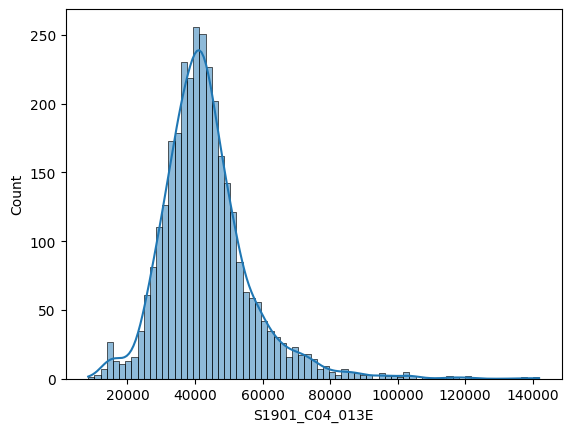


----- S1901_C04_014E -----
This column represents: 'Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Household income in the past 12 months'
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: S1901_C04_014E, dtype: float64
Unique values: 0
Missing: 3221


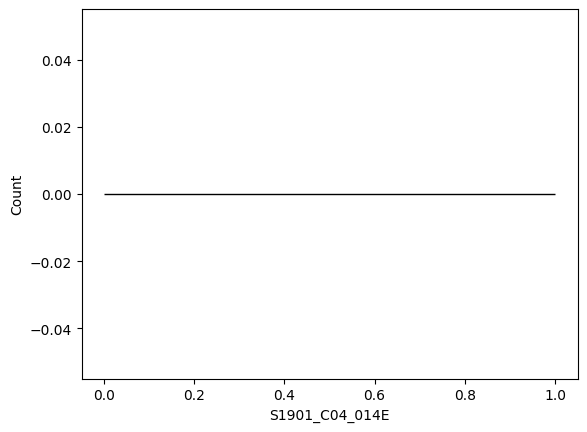


----- S1901_C04_015E -----
This column represents: 'Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months'
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: S1901_C04_015E, dtype: float64
Unique values: 0
Missing: 3221


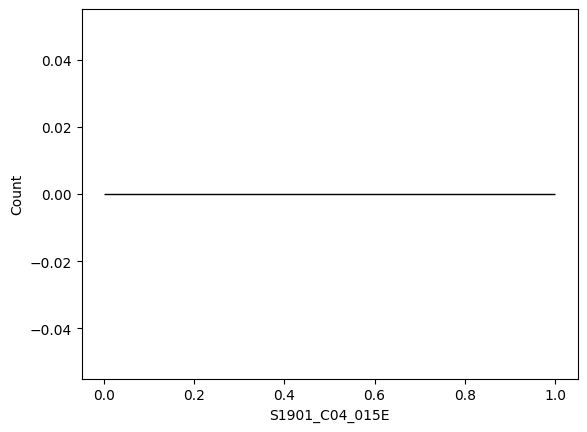


----- S1901_C04_016E -----
This column represents: 'Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months'
count    3221.000000
mean       33.776343
std         7.996291
min         0.000000
25%        29.000000
50%        33.000000
75%        38.000000
max        79.600000
Name: S1901_C04_016E, dtype: float64
Unique values: 437
Missing: 0


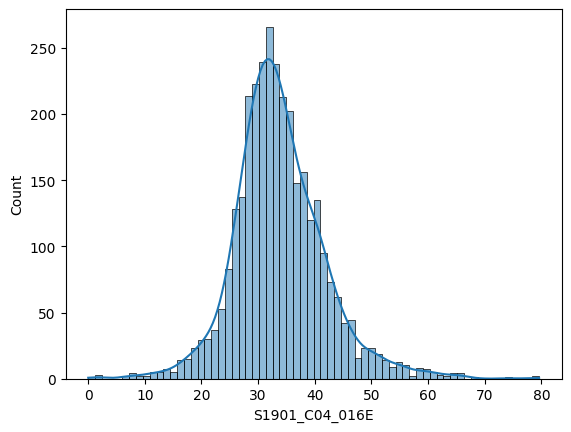


----- STATE -----
This column represents: None
count       3221
unique        52
top        Texas
freq         254
Name: STATE, dtype: object
Unique values: 52
Missing: 0


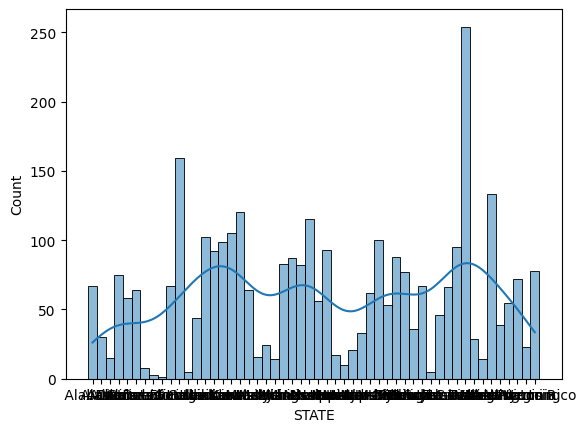

In [17]:
# Define a function to perform EDA on estimation columns
def essential_eda(col: pd.Series):
    col_name = col.name #get name of series
    print(f"\n----- {col_name} -----")

    # now compare against the string name, not the Series itself
    desc = (
        median_reference
        .loc[median_reference["Variable Name"] == col_name, "Description"]
        .squeeze()    # get the singular value
    )
    print(f"This column represents: {desc!r}")

    print(col.describe())
    print("Unique values:", col.nunique())
    print("Missing:", col.isnull().sum())

    
    
    sns.histplot(col, kde=True)
    plt.show()


# Run function on all estimations of median household income
median_percent_estimates = [col for col in median_income_formatted.columns if col.endswith('E')] #all estimates end with letter 'E'

for col in median_percent_estimates:
    essential_eda(median_income_formatted[col])